In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

- Problem Statement
As CEO of a restaurant franchise, you want to expand into cities with the highest profit potential. You have data on existing outlets (city population and profit) and candidate cities (population only). The task is to use this data to predict which new cities are likely to be profitable.

- Dataset
The load_data() function provides:

x_train: city populations

y_train: restaurant profits (negative = loss)

Both are NumPy arrays.

In [2]:

# Load the fake dataset
x_train, y_train = load_data()

In [5]:
print("Type of x_train:",type(x_train))

Type of x_train: <class 'numpy.ndarray'>


## Restaurant Franchise Dataset
I made this fake dataset only for practice purposes. The coursera course used different dataset but I didn't want to use it here, so I create mine.
This dataset simulates a restaurant franchise expansion problem with the following characteristics:

- **Features (x_train)**: City populations in thousands (10k - 1000k people)
- **Target (y_train)**: Restaurant profits in thousands of dollars (negative values = losses)
- **Size**: 100 cities
- **Distribution**: More small cities than large ones (exponential distribution)
- **Realism**: ~20% of restaurants operate at a loss due to local competition and factors

The relationship shows that profit generally increases with population but with diminishing returns - larger cities don't guarantee proportionally higher profits.

In [4]:
print_data(x_train, y_train, num_examples=15)

Dataset contains 100 examples
------------------------------
Population(k) | Profit(k$)
------------------------------
      33.5 |     69.1
     160.5 |    116.1
      75.8 |     89.5
      55.6 |     17.6
      18.5 |    -35.8
      18.5 |     69.9
      13.0 |    100.8
     110.6 |    -19.7
      56.0 |     53.1
      71.6 |    -49.4
      11.0 |     83.0
     185.2 |    145.6
      99.3 |     81.8
      21.9 |     76.3
      20.0 |    -45.4
... and 85 more examples
------------------------------
Population range: 10.3k to 226.7k
Profit range: $-49.4k to $158.3k


## Dataset Shape Analysis

This code examines the dimensions of our training data:

- **x_train.shape**: Shows the shape of input features (city populations)
- **y_train.shape**: Shows the shape of target values (restaurant profits) 
- **len(x_train)**: Counts the total number of training examples (m)

For linear regression, we expect:
- x_train and y_train to have the same number of samples
- Both to be 1D arrays (shape = (m,))
- This gives us m training examples to learn from

### Understanding `.shape` in NumPy

The `.shape` attribute in NumPy shows the **dimensions** of an array — that is, how many rows (samples) and columns (features) it has.

For example:

```python
import numpy as np

# 1D array
a = np.array([10, 20, 30])
print(a.shape)   # (3,)

# 2D array (3 rows × 2 columns)
b = np.array([[1, 2],
              [3, 4],
              [5, 6]])
print(b.shape)   # (3, 2)

In [7]:
print ('x_train shape:', x_train.shape)
print ('y_train shape: ', y_train.shape)
print ('This is the number of training examples(m):', len(x_train))

x_train shape: (100,)
y_train shape:  (100,)
This is the number of training examples(m): 100


## Data Visualization

This code creates a scatter plot to visualize the relationship between city population and restaurant profits:

- `plt.scatter(x_train, y_train, marker='x', c='r')`: Creates a scatter plot with red 'x' markers showing population (x-axis) vs profit (y-axis)
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Set plot title and axis labels
- `plt.show()`: Displays the plot

The plot helps visualize the dataset and understand the relationship between city size and restaurant profitability before applying linear regression.

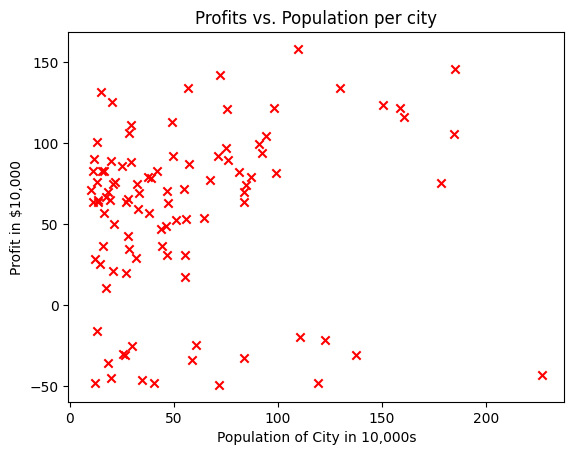

In [ ]:
# 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

Now we want to build a linear regression model that fits the data. This model will allow us to input a city’s population and estimate its expected monthly profit.

## Refresher on Linear Regression

Now, we fit the linear regression parameters **(w, b)** to our dataset.

The model maps input **x** (city population) to output **y** (monthly profit) as:

$$
f_{w,b}(x) = wx + b
$$
Our goal is to find the parameters **(w, b)** that best fit the data by minimizing the **cost function** \( J(w,b) \), which measures how well the model predicts actual values.

We use **gradient descent** to iteratively adjust **(w, b)** toward the values that minimize \( J(w,b) \).  
Once trained, the model can predict a city’s expected profit from its population.


## Compute Cost

Now we want to calculate the **cost function** $J(w, b)$ to track how well our model fits the data as we update parameters $w$ and $b$ during gradient descent.

The **cost function** measures the average squared difference between predicted and actual values:

$$
J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2
$$

where:
- $m$: number of training examples  
- $f_{w,b}(x^{(i)})$: model prediction  
- $y^{(i)}$: actual value  

For linear regression with one variable:

$$
f_{w,b}(x^{(i)}) = w x^{(i)} + b
$$

You will now implement `compute_cost()` to calculate $J(w, b)$ and monitor training progress.

### Exercise 1

Now we want to complete the `compute_cost` function.

- For each training example:
  - Compute the model prediction:  
    $$
    f_{wb}(x^{(i)}) = wx^{(i)} + b
    $$
  - Compute the example cost:  
    $$
    cost^{(i)} = (f_{wb}(x^{(i)}) - y^{(i)})^2
    $$

- Finally, return the total cost over all examples:  
  $$
  J(w,b) = \frac{1}{2m} \sum_{i=0}^{m-1} cost^{(i)}
  $$
  
Here, $m$ is the number of training examples. If you get stuck, check the hints provided below.


- (Check the cost_compute() func in the utils.py file)

In [20]:
# this is another version of the cost_compute() func in the utils.py file
# only for practice purposes

def comp_cost(x, y, w, b):
    m = len(x)
    final_cost = 0
    cost_sum = 0

    for i in range(m):
        f_wb = w*x[i] + b
        cost = (f_wb -y[i])**2 # y[i] is the actual value
        sum_cost += cost
    final_cost = (1/(2*m))*sum_cost
    return final_cost


- Test

In [21]:
# here we define w and b:
initial_b = 3
initial_w = 4
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'cost if w and b are {initial_w} and {initial_b}: {cost:.3f}')



<class 'numpy.float64'>
cost if w and b are 4 and 3: 31133.776


### Gradient Descent Overview

We now want to implement gradient descent, which iteratively updates parameters **w** and **b** to minimize the cost function.

The update rules are:

$$
\begin{align*}
& \text{repeat until convergence:} \; \lbrace \\
& \quad b := b - \alpha \frac{\partial J(w,b)}{\partial b} \\
& \quad w := w - \alpha \frac{\partial J(w,b)}{\partial w} \\
& \rbrace
\end{align*}
$$

The gradients are defined as:

$$
\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}
$$

where:
- \( m \): number of training examples  
- \( f_{w,b}(x^{(i)}) \): model prediction  
- \( y^{(i)} \): true target value  

You will now implement **`compute_gradient`**, which returns  
\(\frac{\partial J(w,b)}{\partial w}\) and \(\frac{\partial J(w,b)}{\partial b}\).


### Exercise 2

Now we want to complete the `compute_gradient` function. For each training example, you will:

1. Compute the model prediction  
   $$
   f_{w,b}(x^{(i)}) = wx^{(i)} + b
   $$

2. Compute the gradients for each parameter  
   $$
   \frac{\partial J(w,b)}{\partial b}^{(i)} = f_{w,b}(x^{(i)}) - y^{(i)}
   $$
   $$
   \frac{\partial J(w,b)}{\partial w}^{(i)} = (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}
   $$

3. Average the gradients over all training examples  
   $$
   \frac{\partial J(w,b)}{\partial b} = \frac{1}{m}\sum_{i=0}^{m-1}\frac{\partial J(w,b)}{\partial b}^{(i)}
   $$
   $$
   \frac{\partial J(w,b)}{\partial w} = \frac{1}{m}\sum_{i=0}^{m-1}\frac{\partial J(w,b)}{\partial w}^{(i)}
   $$

Here, $m$ is the number of training examples and $\sum$ denotes summation.


In [22]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    
    ### START CODE HERE ###
    dj_dw_sum = 0
    dj_db_sum = 0
    
    for i in range (m):
        f_wb = w * x[i] + b
        dj_dw = (f_wb - y[i]) * x[i]
        dj_db = (f_wb - y[i]) 
        dj_dw_sum = dj_dw_sum + dj_dw
        dj_db_sum = dj_db_sum + dj_db
        
    dj_dw = (1/m) * dj_dw_sum
    dj_db = (1/m) * dj_db_sum
    
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

- Test


In [ ]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)


Gradient at initial w, b (zeros): -3489.2310379330384 -56.967626447818766


In [25]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -2437.9792138213134 -45.62014605743004


### Batch Gradient Descent for Linear Regression

Now we want to find the **optimal parameters** of a linear regression model using **batch gradient descent**, which updates parameters after evaluating **all training examples** in each step.



To confirm gradient descent works correctly, observe the **cost function** \( J(w, b) \):
- It should **decrease** with each iteration.
- If the **gradient** and **cost** are implemented correctly and the **learning rate (α)** is appropriate, \( J(w, b) \) will never increase and will eventually **converge** to a steady value.


In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to optimize parameters (w, b).

    Args:
      x (ndarray): Feature data, shape (m,)
      y (ndarray): Target values, shape (m,)
      w_in, b_in (scalars): Initial parameter values
      cost_function (function): Computes cost J(w, b)
      gradient_function (function): Computes gradients for w and b
      alpha (float): Learning rate
      num_iters (int): Number of iterations

    Returns:
      w (float): Final optimized weight
      b (float): Final optimized bias
      J_history (list): Cost at each iteration
      w_history (list): Weight values tracked for plotting
    """
    
    # Number of training examples
    m = len(x)
    
    # Track cost and parameter values for analysis
    J_history = []
    w_history = []

    # Create copies to avoid modifying original parameters
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):

        # Compute gradients
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Record cost at each iteration
        if i < 100000:  # limit memory usage
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        # Display progress every 10% of total iterations
        # because we have 100000 iterations, so it will display every 10000 iterations
        # math.ceil() is used to round up to the nearest integer
        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}")
        
    return w, b, J_history, w_history


Now we’ll run the gradient descent algorithm to train our dataset parameters.

In [30]:
# Initialize model parameters (w: weights, b: bias)
# w has shape (n,), where n is the number of features
initial_w = 0.
initial_b = 0.

# Set hyperparameters for gradient descent
iterations = 1500
alpha = 0.0001   # learning rate

# Run batch gradient descent to find optimal w and b
# w, b, _, _ : _ is a dummy variable because we don't need the other outputs
w, b, _, _ = gradient_descent(x_train, y_train, initial_w, initial_b,
                              compute_cost, compute_gradient, alpha, iterations)

print("Parameters found by gradient descent: w =", w, ", b =", b)

Iteration    0: Cost  2082.97
Iteration  150: Cost  1807.66
Iteration  300: Cost  1802.02
Iteration  450: Cost  1796.45
Iteration  600: Cost  1790.95
Iteration  750: Cost  1785.51
Iteration  900: Cost  1780.13
Iteration 1050: Cost  1774.82
Iteration 1200: Cost  1769.58
Iteration 1350: Cost  1764.40
Parameters found by gradient descent: w = 0.6403744462986792 , b = 2.8553044390062596


### Plotting the Linear Fit

Now we want to use the final parameters from gradient descent to plot the linear fit.

The prediction for a single example is given by:

$$ f(x^{(i)}) = w \cdot x^{(i)} + b $$

To make predictions for the entire dataset, we calculate this value for each training example, as shown in the code below.


In [ ]:
# Notice, w and b are updated with the final values from gradient descent
# in the previous cell!
m = x_train.shape[0] # number of training examples. Alternative: m = len(x_train)
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

- Plot


### Visualizing the Linear Fit

Now we want to **visualize the relationship** between population ($x$) and profit ($y$).  
We plot the **training data** as red crosses and overlay the **predicted linear fit** in blue.  
This helps us see how well the model captures the trend between population and profit:



Text(0.5, 0, 'Population of City (in 10,000s)')

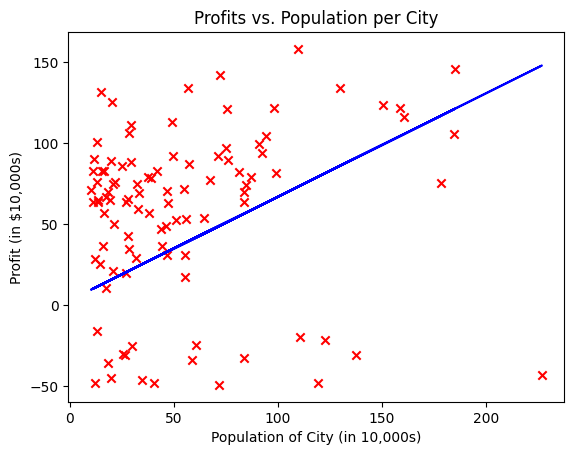

In [35]:
# Plot the predicted linear regression line
plt.plot(x_train, predicted, c="b")

# Plot the training data as red scatter points
plt.scatter(x_train, y_train, marker='x', c='r')

# Add a chart title
plt.title("Profits vs. Population per City")

# Label the y-axis
plt.ylabel("Profit (in $10,000s)")

# Label the x-axis
plt.xlabel("Population of City (in 10,000s)")


## Model Performance Analysis

### Current Issue: Poor Model Fit

The linear regression model is not fitting the data that well, as evidenced by the scatter plot showing significant deviations between the predicted line and actual data points. The model struggles to capture the underlying relationship between city population and restaurant profits.

### Potential Solutions

#### 1. **Data Normalization**
- **Problem**: The features (population: 0-220) and target (profit: -50 to 150) are on vastly different scales
- **Solution**: Normalize the input features using Z-score normalization: `x_norm = (x - mean) / std`
- **Benefits**: 
  - Faster convergence during gradient descent
  - More stable numerical computations
  - Allows for larger learning rates without overflow
  - Prevents gradient explosion/vanishing

#### 2. **Outlier Removal (Data Cleaning)**
- **Problem**: Negative profit values represent failed restaurants that don't follow the normal business pattern
- **Solution**: Remove data points where `profit < 0` or use robust statistical methods (MAD, IQR) to detect outliers
- **Benefits**:
  - Eliminates noise from atypical business cases
  - Allows the model to focus on successful restaurant patterns
  - Improves model fit for the majority of data points
  - Reduces the influence of extreme values on parameter estimation

### Recommended Approach

Both solutions are valid and can be used together:
1. **First**: Clean the dataset by removing profit outliers (Those kinds of data that are so different from the other points)
2. **Second**: Apply normalization to the cleaned dataset
3. **Result**: A more robust model that fits the majority of successful restaurant patterns

This combination addresses both the scale mismatch issue and the presence of anomalous data points that don't represent typical restaurant success patterns.